# Figure 1: Mask overlap

In [1]:
import os
import json
import base64
from matplotlib import pyplot as plt
import cv2
from PIL import Image
from io import BytesIO
import numpy as np
import pandas as pd

### Pick some images:

In [2]:
images = ['7.jpg',
 '19.jpg',
 '31.jpg',
 '68.jpg',
 '198.jpg',
 '227.jpg',
 '232.jpg',
 '284.jpg',
 '308.jpg'
]

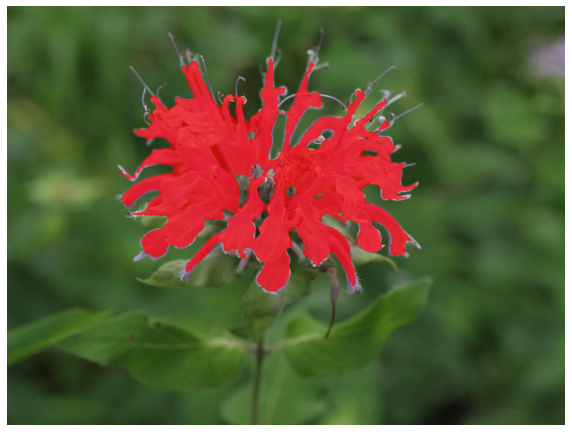

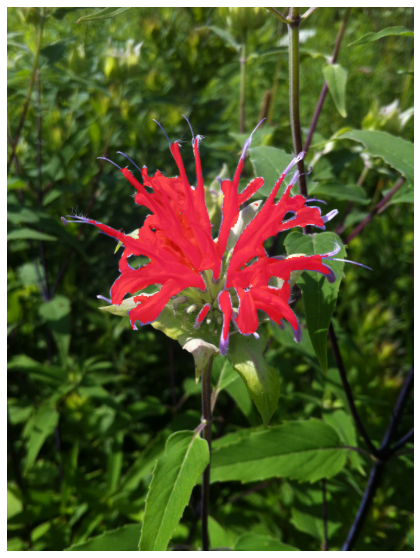

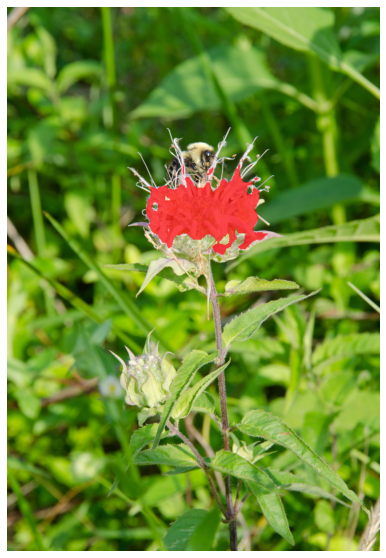

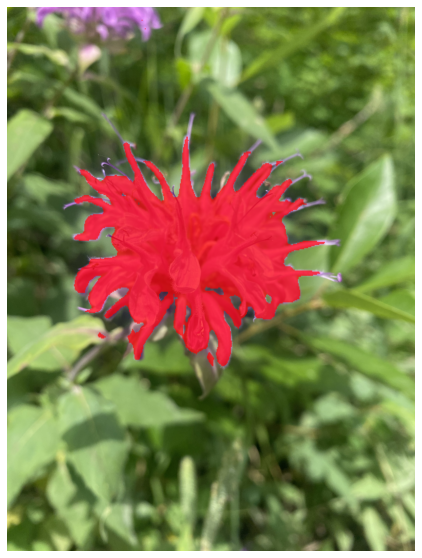

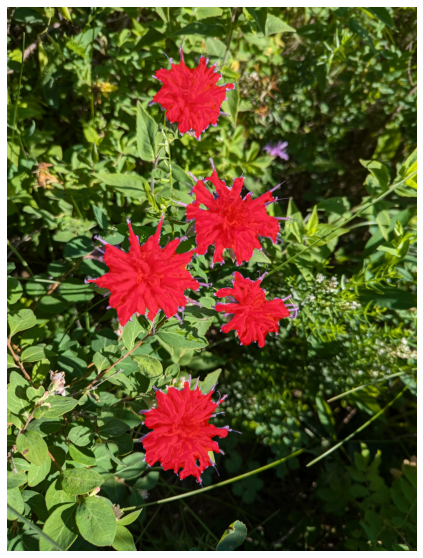

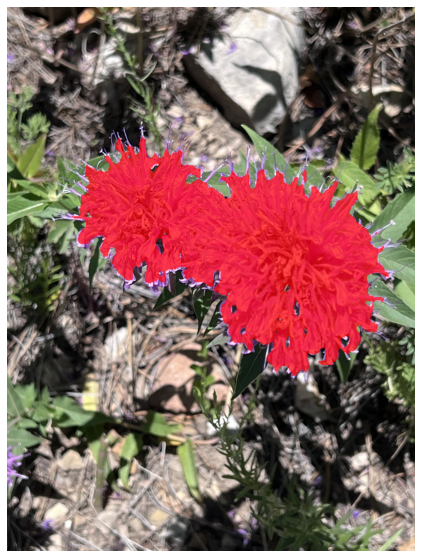

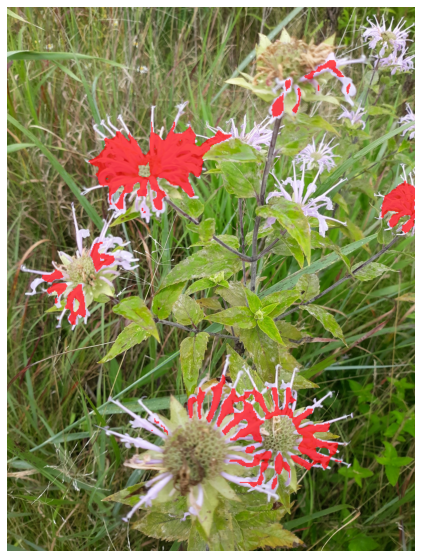

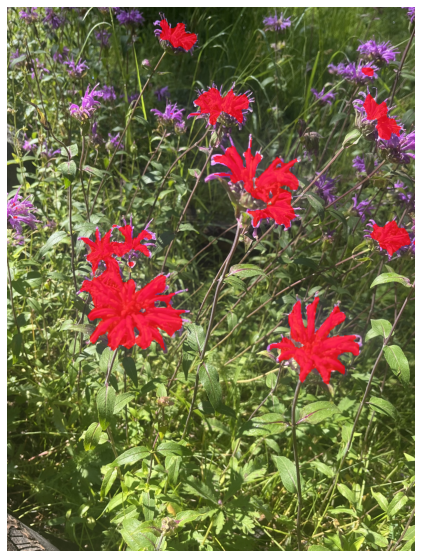

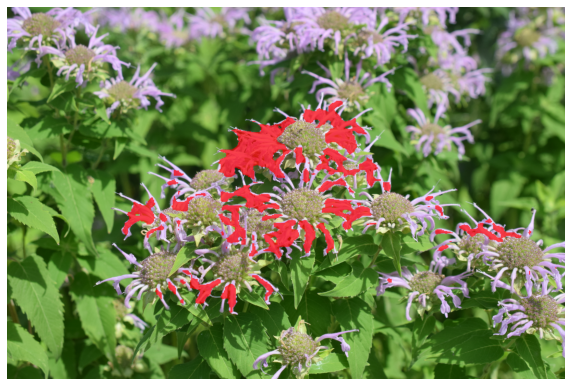

In [3]:
for image in images:
    image_path = os.path.join("/Volumes/My Passport/monarda_fistulosa_segmentation/image_dataset/gpt_filtered_images/",image)
    base_name = os.path.basename(image_path)
    base_name_no_ext = os.path.splitext(base_name)[0]
    json_path = os.path.join('/Volumes/My Passport/monarda_fistulosa_segmentation/segmentation_results',f"{base_name_no_ext}.json")

    with open(json_path, "r") as json_file:
        data = json.load(json_file)

    # base64 segmentation mask
    seg_mask_base64 = data['segmentation_mask']

    # decode mask
    mask_data = base64.b64decode(seg_mask_base64)
    mask_image = Image.open(BytesIO(mask_data))
    mask_np = np.array(mask_image)

    # read the image
    orig_img = cv2.imread(image_path)
    orig_img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    # resize mask to match image dims
    mask_resized = cv2.resize(mask_np, (orig_img_rgb.shape[1], orig_img_rgb.shape[0]), interpolation=cv2.INTER_NEAREST)
    

    alpha = 0.7 # transparency
    mask_bool = mask_resized.astype(bool)

    # make a copy to draw on
    overlay = orig_img_rgb.copy()

    # solid mask color
    color = np.array([255, 0, 0], dtype=np.float32)

    # adding transparency
    # for each channel, blend only where mask==1
    for c in range(3):
        # orig channel values
        orig_chan = overlay[..., c].astype(np.float32)
        # blended channel
        # = (1-alpha)*orig + alpha*color[c]
        blended = (1 - alpha) * orig_chan + alpha * color[c]
        # write back only under mask
        orig_chan[mask_bool] = blended[mask_bool]
        overlay[..., c] = orig_chan.astype(np.uint8)

    # now plot/save
    plt.figure(figsize=(10,10))
    plt.imshow(overlay)
    plt.axis('off')
    plt.savefig(f"../figures/figure_puzzling/mask_{image}", dpi=300, bbox_inches='tight')
    plt.show()